## Purpose: Let's see what we can gather from analyzing an article about "Why open secrets exist in organizations" from text analysis alone

Article: https://hbr.org/2019/01/why-open-secrets-exist-in-organizations

Referenced Code from: https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

### Here we go with the python script!

How many most common words to print: 25

OK. The 25 most common words are as follows

issue :  15
employees :  10
managers :  10
less :  8
speak :  8
speaking :  7
aware :  7
issues :  6
one :  6
bystander :  6
effect :  6
others :  6
responsibility :  6
problems :  6
peers :  6
problem :  5
team :  5
company :  5
likely :  5
also :  5
students :  5
organizations :  4
know :  4
management :  4
found :  4


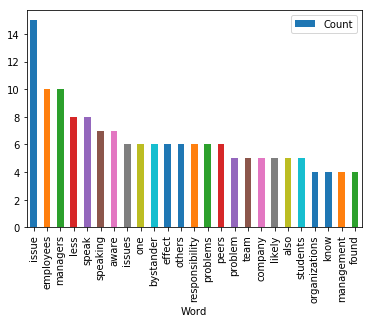

In [2]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('opensecrets.txt', encoding="utf8")
a= file.read()

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords.words("english"):
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
    
# Close the file
file.close()

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### Summary: Purely based on the most common word count here, employees have issues with their managers (of course they do) but also there seems to a level of accountability and responsibility with their peers.

Insight: Peers and other co-workers are just as important to why "open secrets" exist. Otherwise, why would it be open and not just a secret.

In [7]:
import nltk

bigrm = nltk.bigrams(word_counter)
fdist = nltk.FreqDist(bigrm)
fdist.most_common(10)

[(('\ufeffin', '2017'), 1),
 (('2017', 'new'), 1),
 (('new', 'york'), 1),
 (('york', 'times'), 1),
 (('times', 'broke'), 1),
 (('broke', 'widely-known'), 1),
 (('widely-known', 'scandal'), 1),
 (('scandal', 'media'), 1),
 (('media', 'mogul'), 1),
 (('mogul', 'harvey'), 1)]

## Next Steps
* Use TFIDF to find important terms that the article references (find terms that are not common)
* Find People, Places, Things that the article references as seen from the bigrams (e.g. Harvey Weinstein and New York) 